In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#setting parameter for image data augmentation to the training data. 

train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.1,
                                    zoom_range=0.1,
                                    horizontal_flip = True)


In [3]:
#image data augmentation to the testing data.

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_folder="Desktop/Garbageclassification"
test_folder="Desktop/pattu/test"

In [5]:
# Generate the training and testing datasets using the flow_from_directory method
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical'
)


Found 2527 images belonging to 6 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
    test_folder,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical'
)


Found 782 images belonging to 6 classes.


In [7]:
#to define linear initializations import Sequential

from tensorflow.keras.models import Sequential

#To add Layers import Dense

from tensorflow.keras.layers import Dense

# to create a convolution kernel import Convolution2D 

from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Convolution2D 

#Adding Max pooling Layer 

from tensorflow.keras.layers import MaxPooling2D  

#Adding Flatten Layer

from tensorflow.keras.layers import Flatten

from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first Convolutional layer with 32 filters and a (3, 3) kernel size
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))

# Add a MaxPooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before feeding it to the Dense layers
model.add(Flatten())

# Add the first Dense layer with 150 units and ReLU activation
model.add(Dense(150, activation='relu'))

# Add the second Dense layer with 68 units and ReLU activation
model.add(Dense(68, activation='relu'))

# Add the final Dense layer with 6 units (6 classes for classification) and softmax activation
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 150)               19051350  
                                                                 
 dense_1 (Dense)             (None, 68)                10268     
                                                                 
 dense_2 (Dense)             (None, 6)                 414       
                                                      

In [10]:
res = model.fit(
                          train_generator,
                          steps_per_epoch=2527//64, 
                          validation_steps=782//64,
                          epochs=30,
                          validation_data=test_generator)

Epoch 1/30
39/39 [==============================] - 72s 2s/step - loss: 3.9591 - accuracy: 0.2520 - val_loss: 1.4492 - val_accuracy: 0.4635
Epoch 2/30
39/39 [==============================] - 64s 2s/step - loss: 1.3789 - accuracy: 0.4458 - val_loss: 1.2697 - val_accuracy: 0.4987
Epoch 3/30
39/39 [==============================] - 64s 2s/step - loss: 1.2585 - accuracy: 0.5051 - val_loss: 1.1832 - val_accuracy: 0.5234
Epoch 4/30
39/39 [==============================] - 64s 2s/step - loss: 1.1317 - accuracy: 0.5700 - val_loss: 1.0503 - val_accuracy: 0.5651
Epoch 5/30
39/39 [==============================] - 63s 2s/step - loss: 1.0810 - accuracy: 0.5887 - val_loss: 0.9928 - val_accuracy: 0.6198
Epoch 6/30
39/39 [==============================] - 64s 2s/step - loss: 1.0276 - accuracy: 0.6179 - val_loss: 0.9301 - val_accuracy: 0.6393
Epoch 7/30
39/39 [==============================] - 64s 2s/step - loss: 0.9701 - accuracy: 0.6374 - val_loss: 0.9217 - val_accuracy: 0.6471
Epoch 8/30
39/39 [==

In [11]:
model.save('Garbage1.h5')

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Garbage.h5')



In [3]:
from tensorflow.keras.preprocessing import image

In [4]:
img = image.load_img(r"glass9.jpg", target_size=(128,128))

x=image.img_to_array(img) #converting in to array format

x=np.expand_dims (x, axis=0) #changing its dimensions as per our requirement #img_data=preprocess_input(x)


In [5]:
#img_data.shape

a=np.argmax(model.predict(x), axis=1)


1/1 [==============================] - 0s 474ms/step


In [10]:
index = ['0','1','2','3','4','5']
result = str(index[a[0]])
result

'1'

GLASS


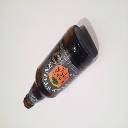

In [9]:
index1 = ['CARDBOARD','GLASS','METAL','PAPER','PLASTIC','TRASH']
result1 = str(index1[a[0]])
print(result1)
img